**PROJECT TEAM ID:** PTID-CDS-JAN-24-1768      
**PROJECT CODE :** PRCP-1013-WalkRunClass      
**PROJECT NAME :** Walking Running Classification      

## Business case

 * Objective of this entire project is to determine the status of a person like either the person is walking or running based  
   data provided which was using the sensors.
 * Precise activity recognition ensures users receive accurate feedback on their physical activities, aligning with the escalating demand for personalized health and fitness monitoring. 
 * This technology, driven by wearable gadgets and smartphone motion sensors, offers a cutting-edge approach to activity categorization. 
 * The business case is grounded in the potential for data-driven insights, catering to the growing market of health-conscious consumers.
 * Success metrics include system accuracy, heightened user engagement, and a positive impact on users' health and fitness journeys. 
  * The business opportunity lies in meeting the burgeoning demand for advanced, personalized wellness technologies that     seamlessly integrate with users' daily lives.


## Domain Analysis

 * From the given data we have to predict and develop a model where a person is walking or running based on thevarious inputs received by the sensors like accelerometers and gyroscopes.  
 ##### Accelerometers
  * Accelerometers measure acceleration along one or more axes, converting this information into electrical signals used in   applications such as motion sensing in consumer electronics and vehicle stability control in automotive systems.

 #### Gyroscopes
   * Gyroscopes measure angular velocity or rotational motion along one or more axes, providing information on orientation changes used in navigation systems, image stabilization in cameras, and motion tracking in virtual reality applications.

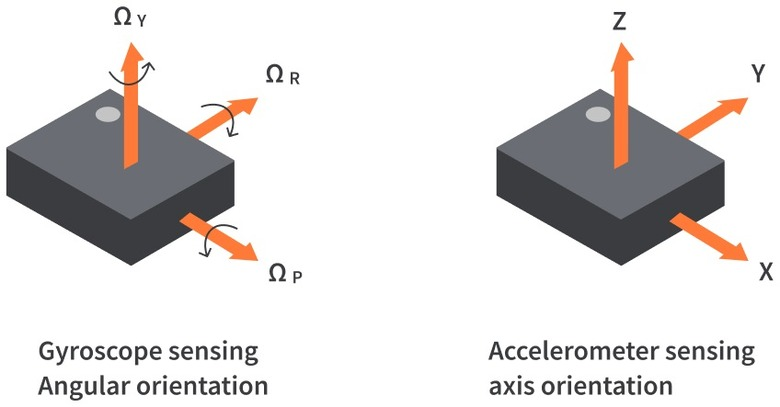

**The attributes provides in the dataset:**  
**Date and Time:** It provides information on the calendar date and clock timestamp, respectively, for recorded motion sensor readings, enabling analysis of activities over specific days with a temporal perspective..  
**Username:** Identification of users contributing to the dataset.  
**Wrist:** Identifies the wrist (left or right) where the sensor is placed.   
**Activity:** The target variable indicating whether the user is walking or running.  
**Acceleration and Gyro Readings:** Raw sensor data capturing movement along different axes.  

In [322]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score

In [323]:
data = pd.read_csv("walkrun.csv")
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


### Basic Checks

In [324]:
data.head(10)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,2017-6-30,13:51:17:46806991,viktor,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,2017-6-30,13:51:17:246767997,viktor,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473
7,2017-6-30,13:51:17:446569025,viktor,0,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348
8,2017-6-30,13:51:17:646152973,viktor,0,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759
9,2017-6-30,13:51:17:846502006,viktor,0,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982


In [325]:
data.tail(10)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88578,2017-7-9,20:9:14:317170977,viktor,0,0,0.4710,-1.0746,-0.3969,0.5324,-0.5367,0.2032
88579,2017-7-9,20:9:14:516991972,viktor,0,0,0.3830,-1.0602,-0.3195,-0.9058,-0.1437,-1.0889
88580,2017-7-9,20:9:14:717123985,viktor,0,0,0.1752,-0.9057,-0.0718,-1.5932,0.7643,-1.4539
88581,2017-7-9,20:9:14:917038023,viktor,0,0,0.3138,-0.8072,-0.0746,-0.2977,0.8706,-0.1177
88582,2017-7-9,20:9:15:117208003,viktor,0,0,0.4480,-1.0231,-0.2715,1.0799,-0.9116,2.5342
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [326]:
data.describe()   #here it gives the statistical data about the columns

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [327]:
data.describe(include='O')  #here it is the statistical data about the categorical data

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [328]:
data.info()    #here it gives the data about data type,index of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [329]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [330]:
data.activity.value_counts() 

1    44365
0    44223
Name: activity, dtype: int64

In [331]:
data.username.value_counts()

viktor    88588
Name: username, dtype: int64

In [332]:
data.wrist.value_counts() #0 left 1 right

1    46258
0    42330
Name: wrist, dtype: int64

In [333]:
data.activity.value_counts() #0 walk 1 run

1    44365
0    44223
Name: activity, dtype: int64

### Insights:
* From above data we can observe that there are no null values.
* No corrupted data.
* The data is well balanced.
* No need of applying scaling aslo as all the values are in similar range.


### Exploratory Data Analysis(EDA)
  * Exploratory Data Analysis (EDA) in machine learning involves examining and understanding the structure, patterns, and relationships within the dataset to inform feature selection, preprocessing, and model building.
  * It typically includes tasks such as data cleaning, visualization, statistical analysis, and feature engineering to identify trends, outliers, and potential insights that can guide the model development process and improve predictive performance.
  * EDA aims to gain actionable insights into the data and ensure that it is suitable for modeling, ultimately enhancing the effectiveness and interpretability of machine learning models.

####  Univariate Analysis
* Univariate analysis in machine learning involves analyzing each variable independently to assess its distribution and characteristics, using techniques like histograms and summary statistics to gain insights into the dataset's structure and potential data quality issues. 
* It helps identify outliers, understand variable behavior, and inform feature engineering decisions in model development.

#### Sweetviz
* Sweetviz is a Python library for automatic EDA, generating comprehensive reports with visualizations and statistical summaries, facilitating quick insights into dataset characteristics, including distributions, correlations, and missing values.
#### Histplots
* Histplots, short for histogram plots, are graphical representations of the distribution of numerical data, displaying the frequency of values within specified bins.
* They provide a quick overview of data distributions, revealing patterns, central tendencies, and potential outliers, aiding in exploratory data analysis and understanding variable behavior in datasets.






                                             |                                             | [  0%]   00:00 ->…


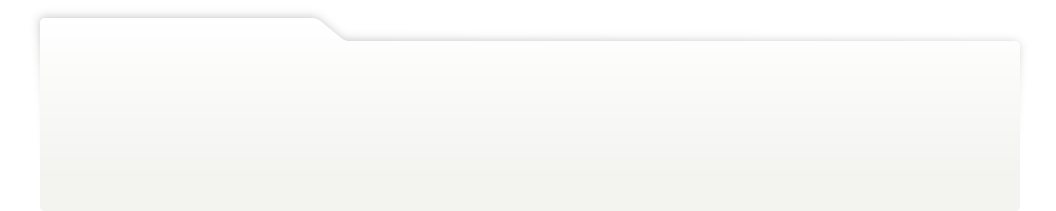
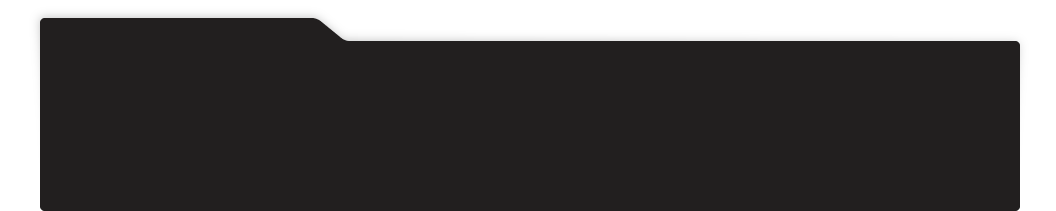
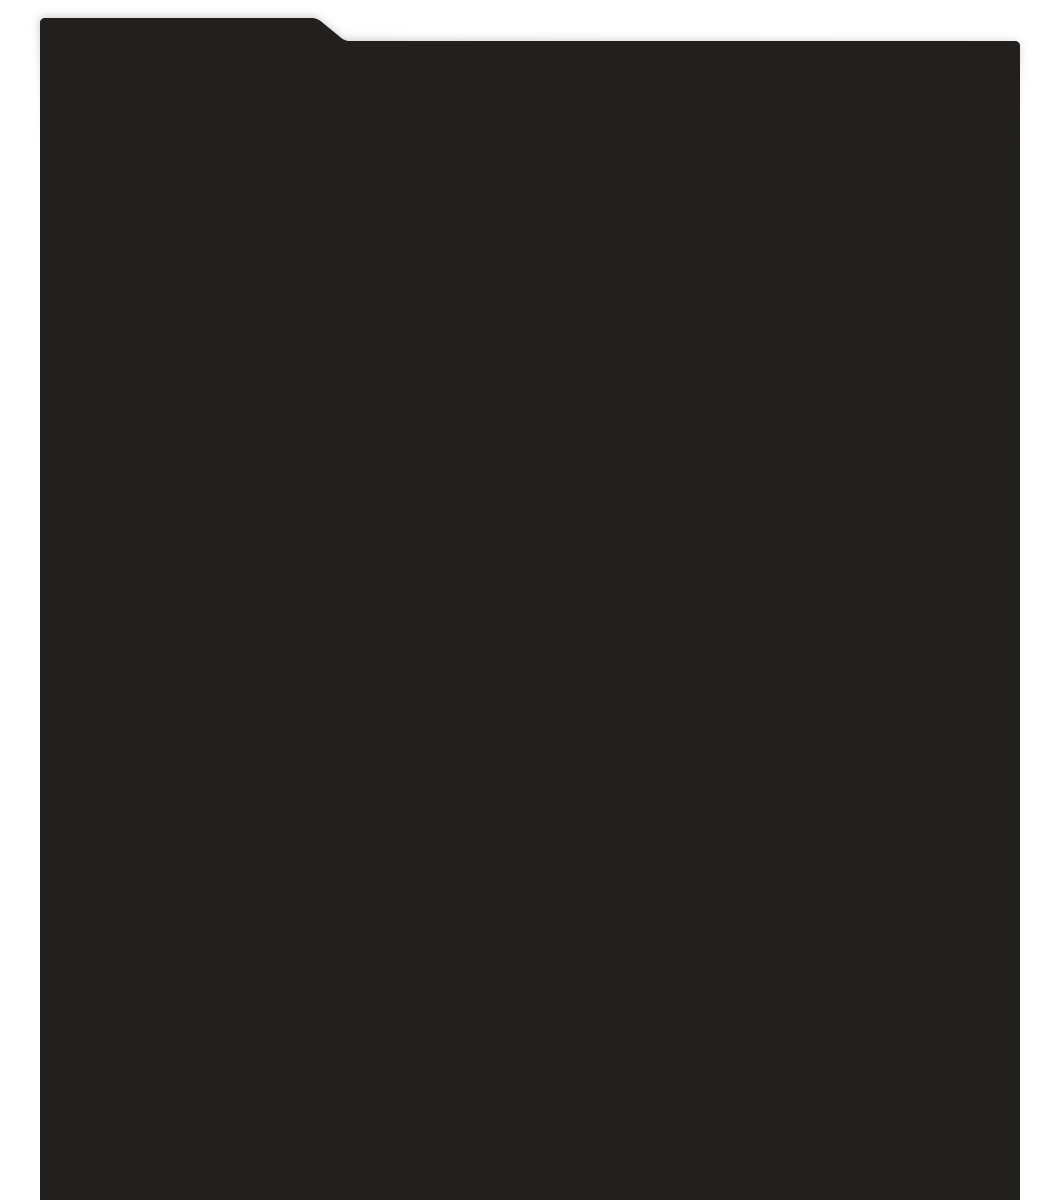
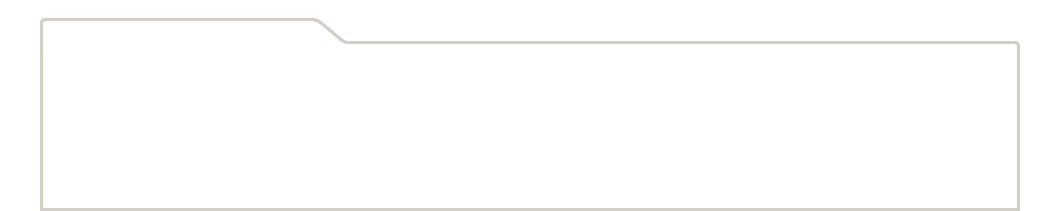
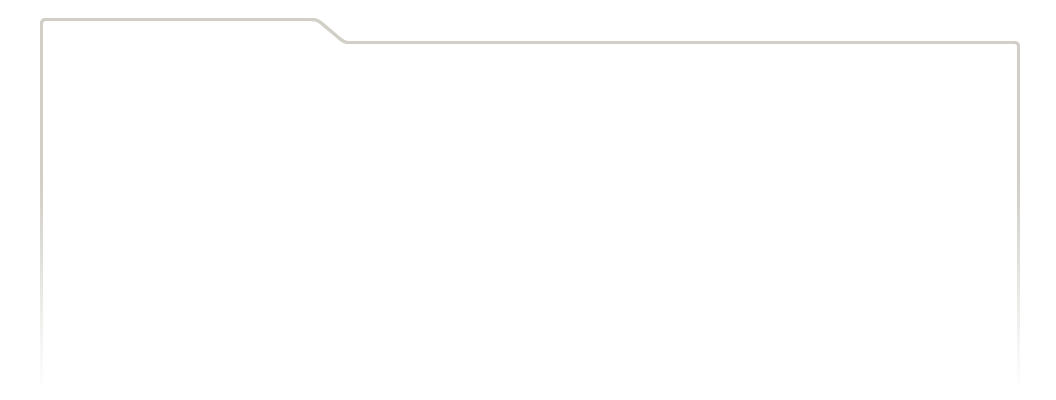
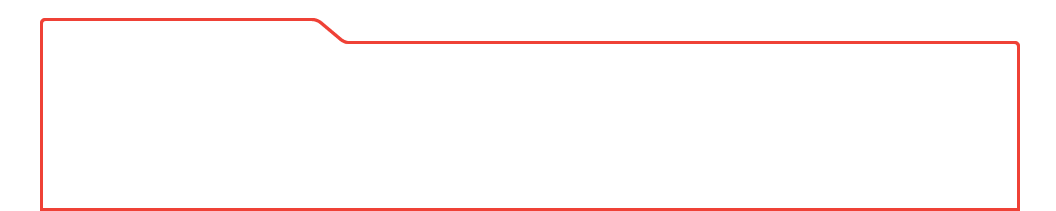
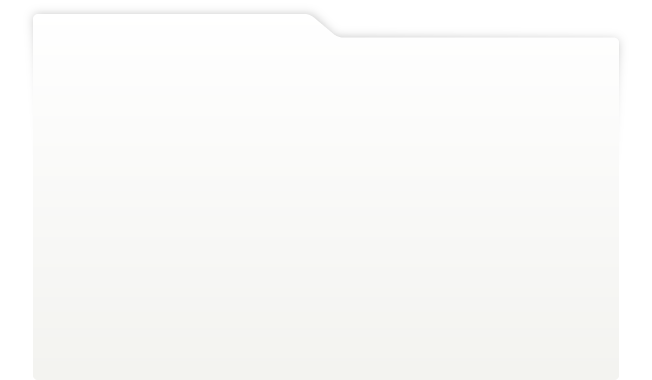
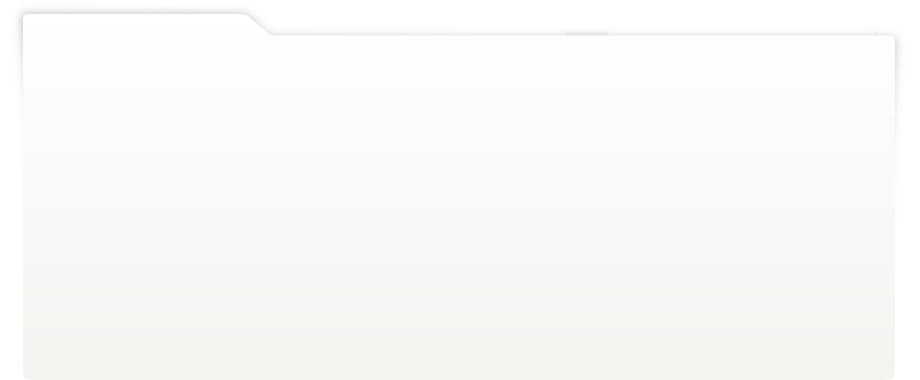
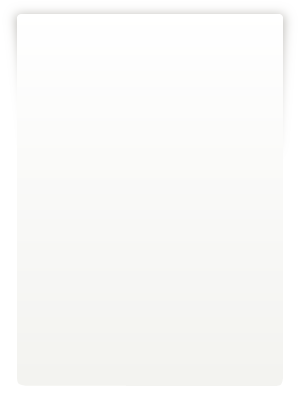
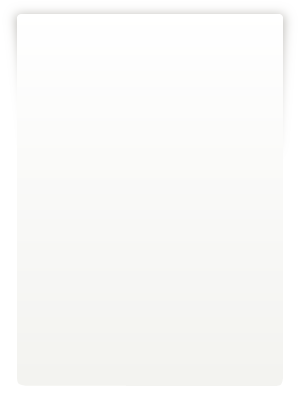
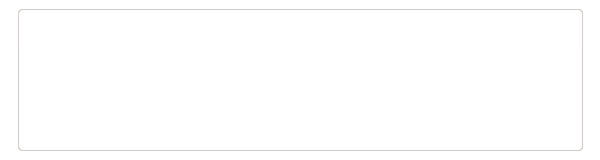
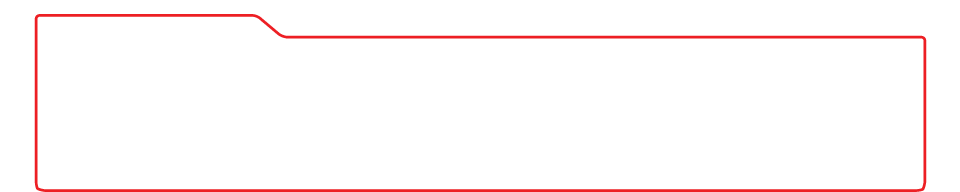
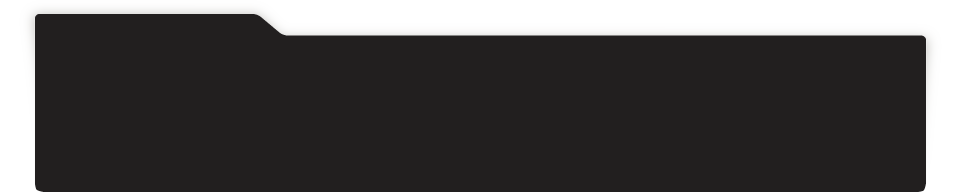
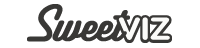
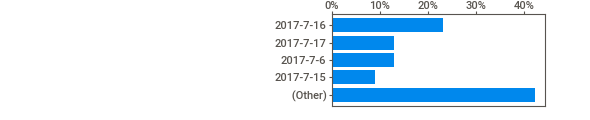
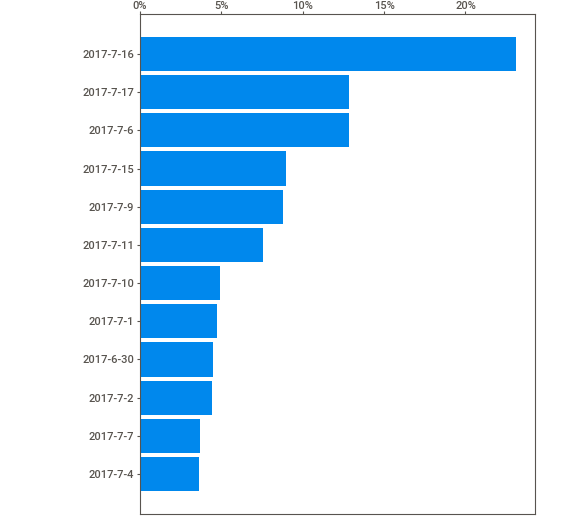
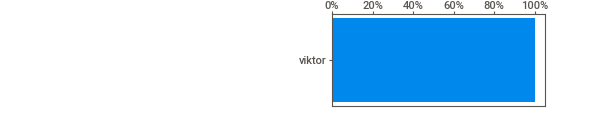
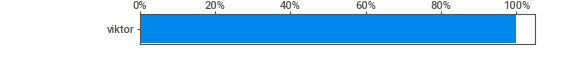
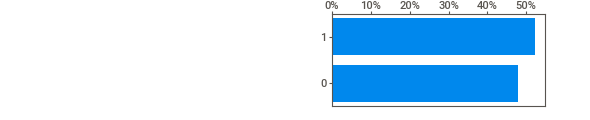
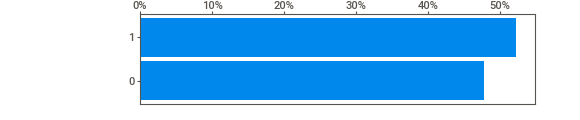
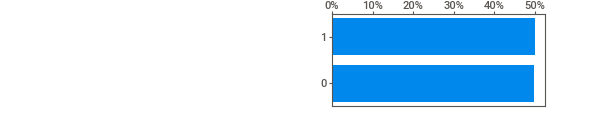
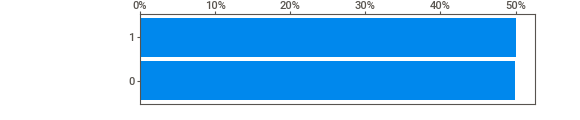
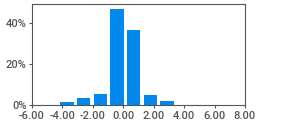
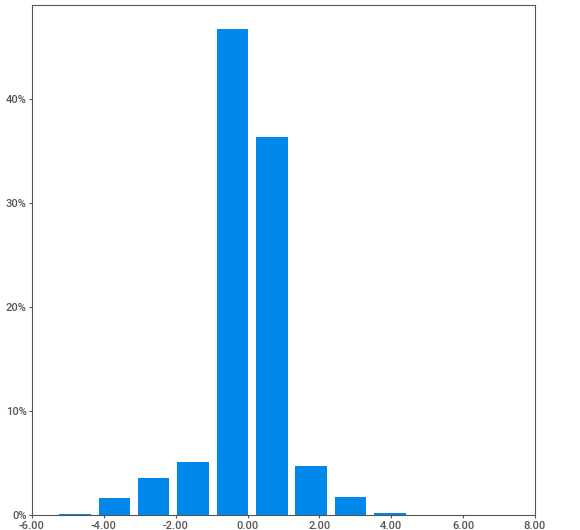
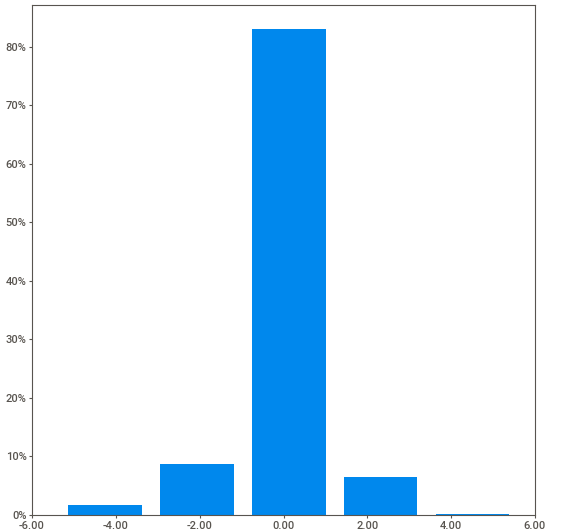
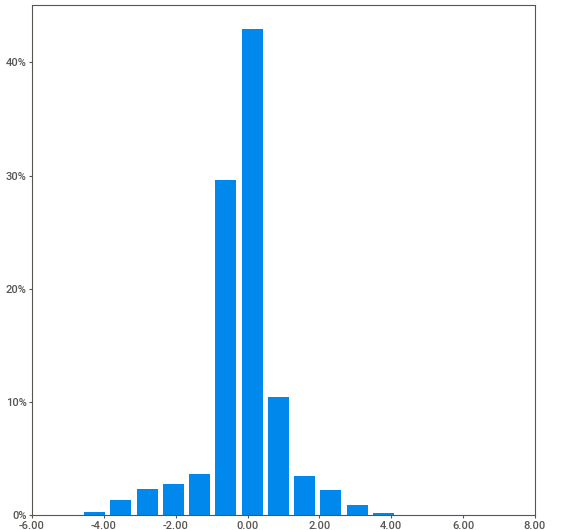
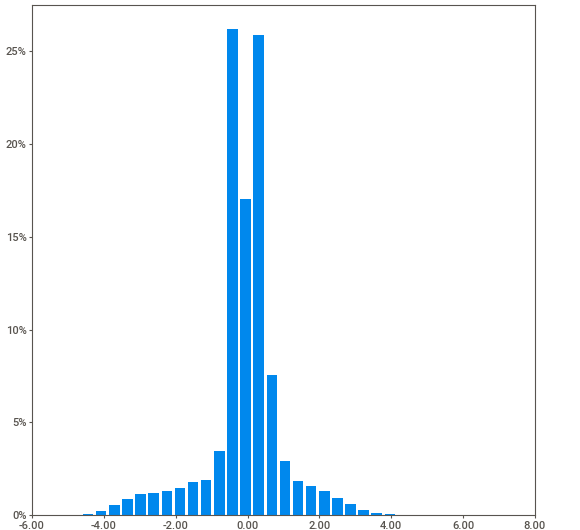
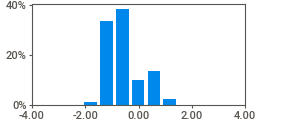
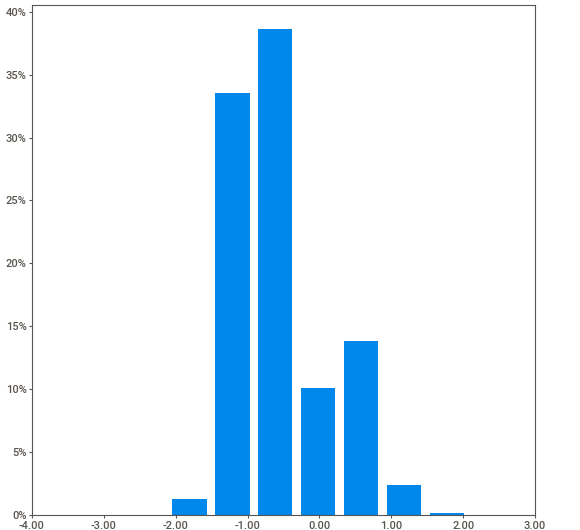
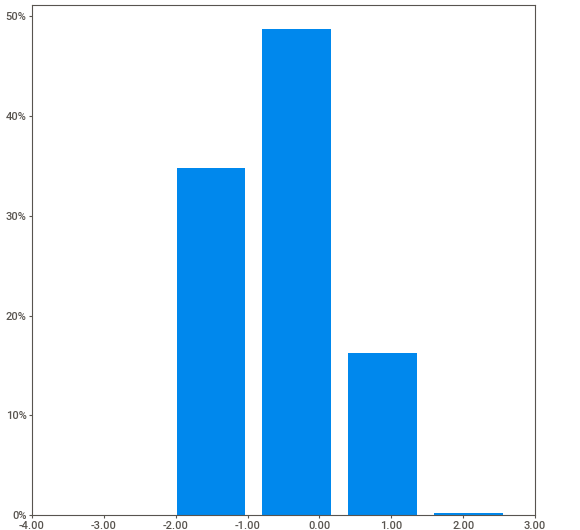
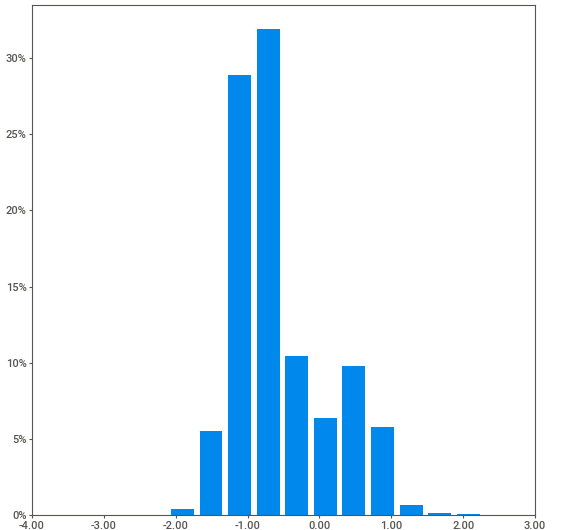
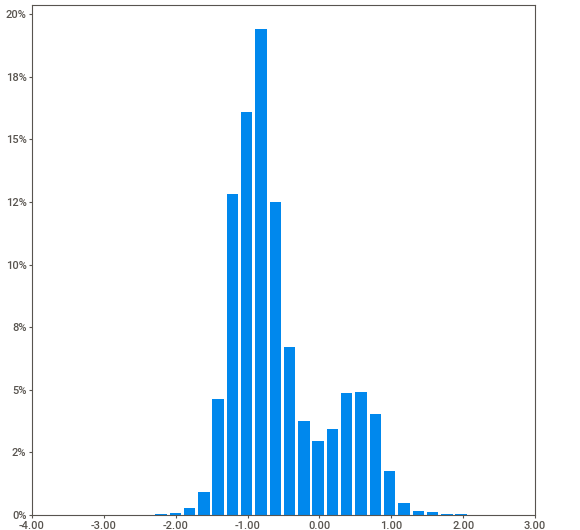
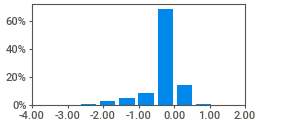
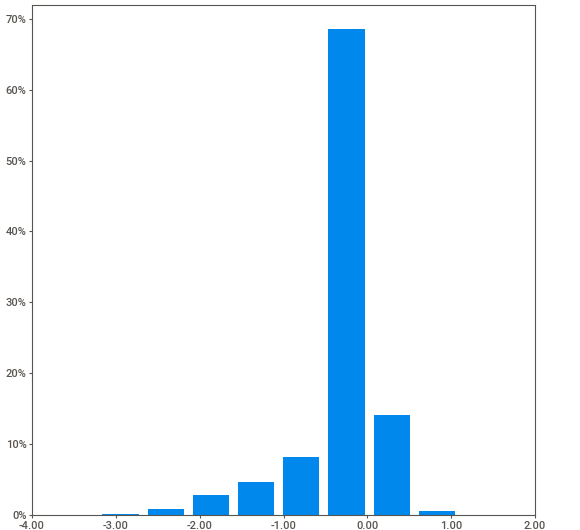
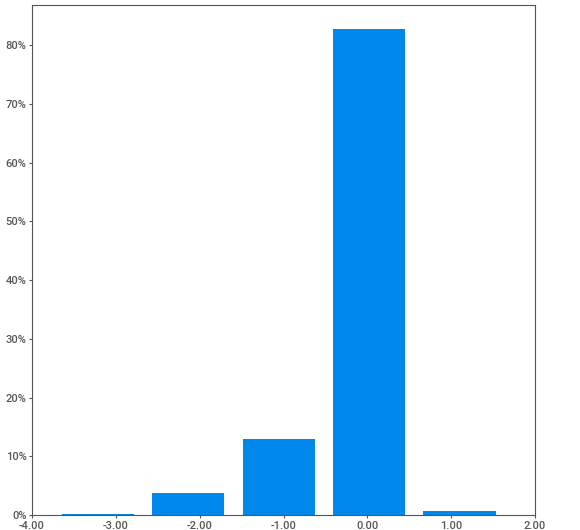
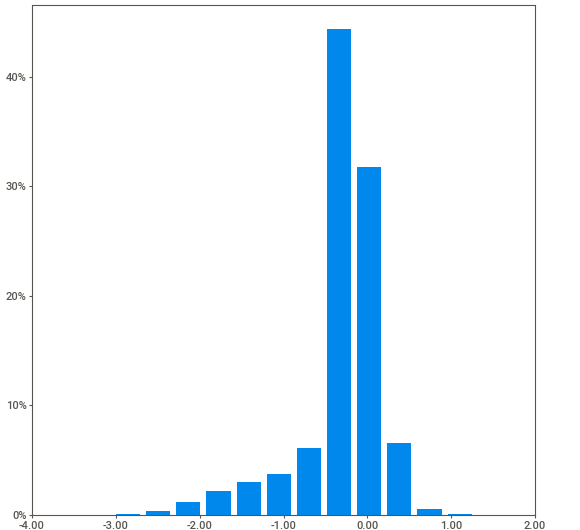
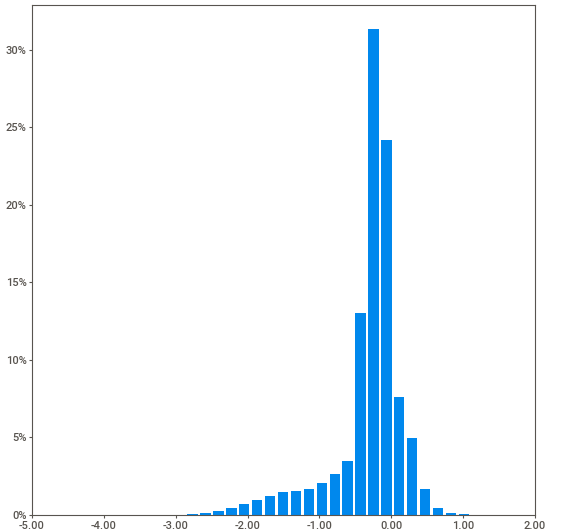
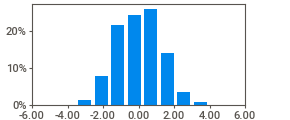
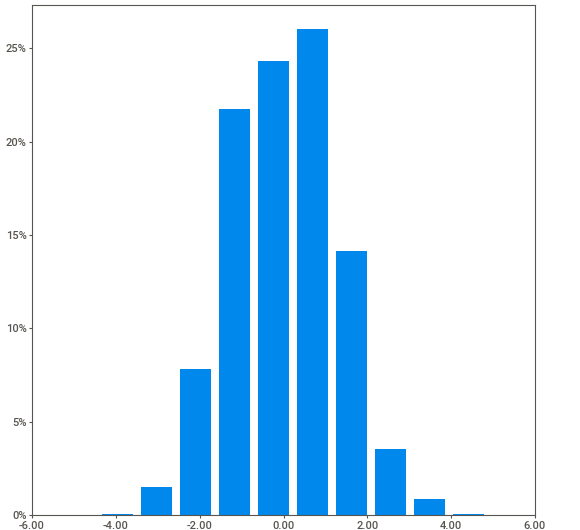
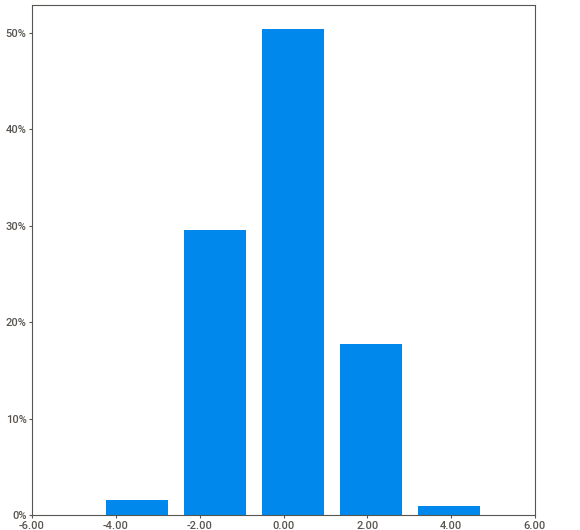
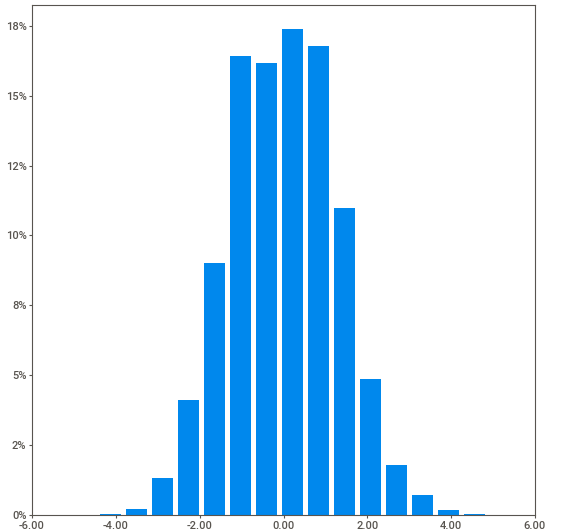
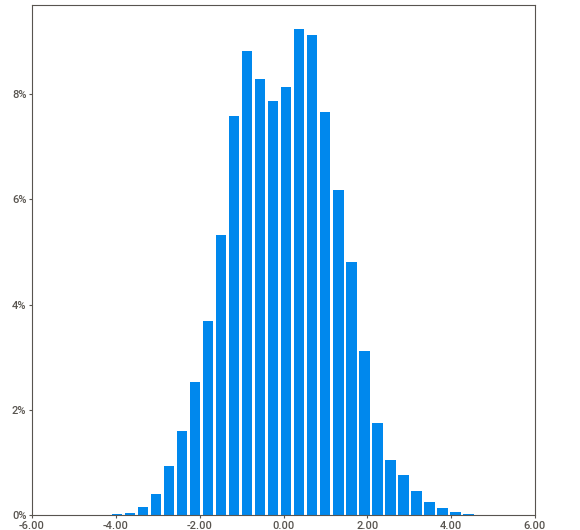
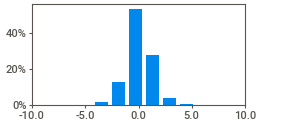
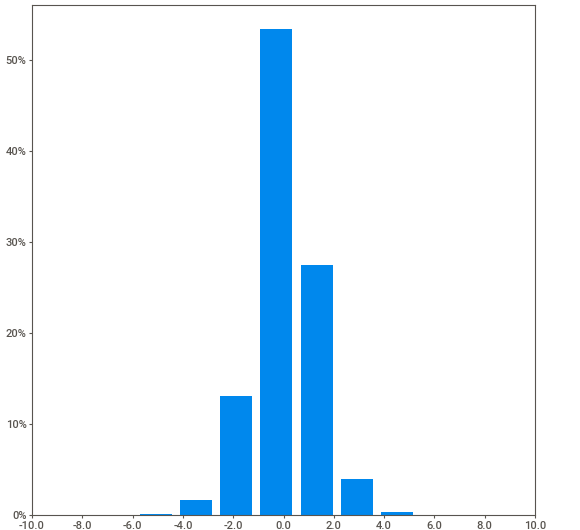
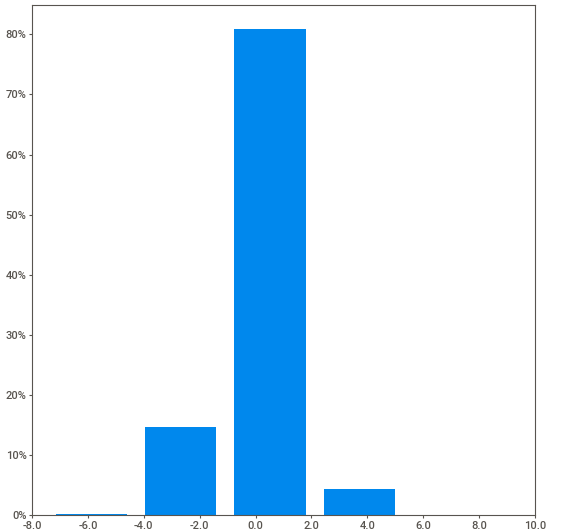
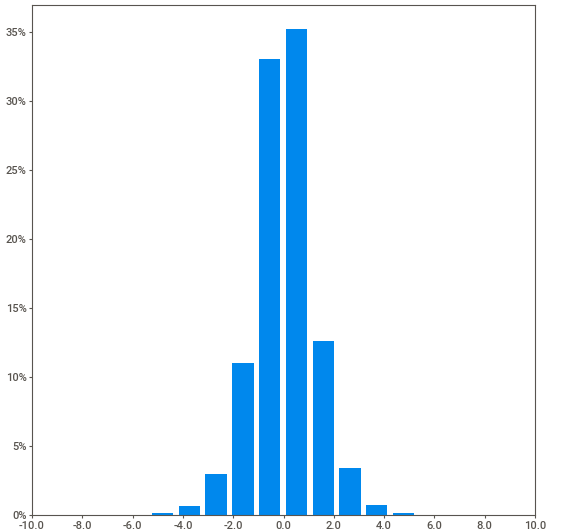
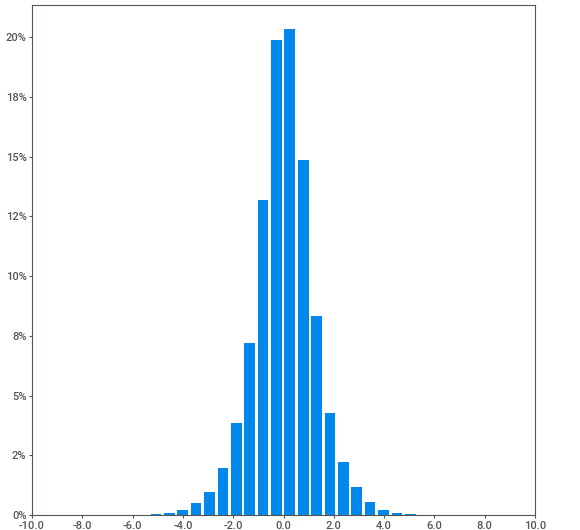
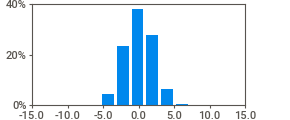
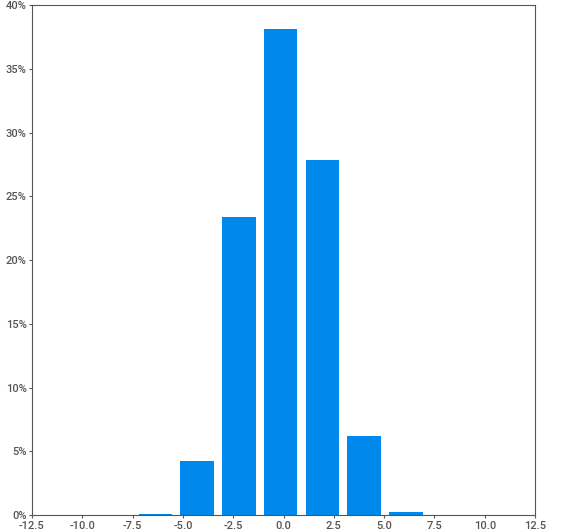
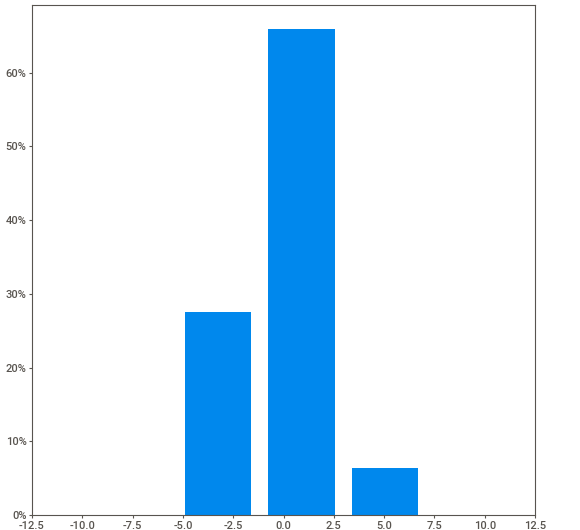
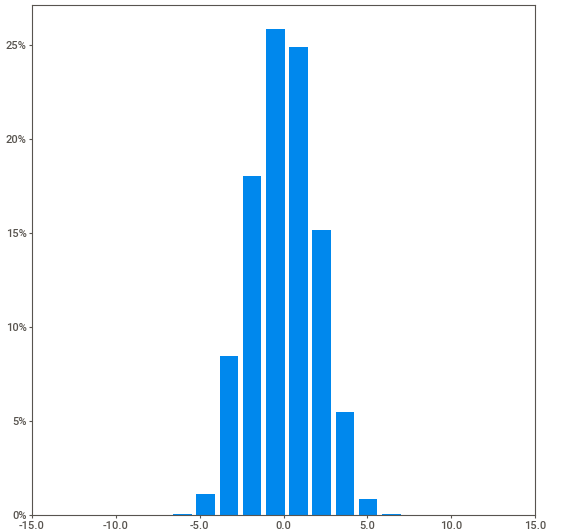
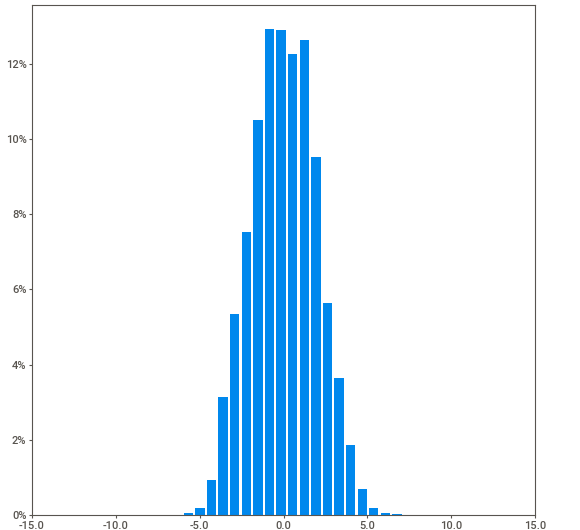
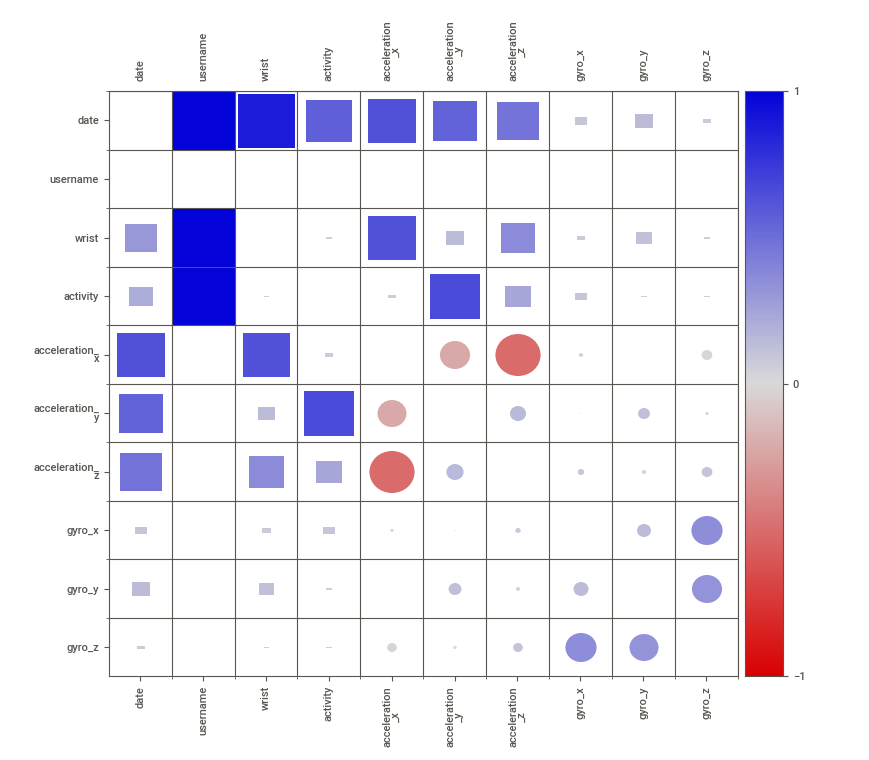
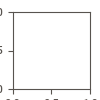

In [334]:
my_report = sv.analyze(data)
my_report.show_notebook()

####  Insights :
 a)After performing Univariate analysis by using sweetviz, this Visualization depicts that on 2017-16-7 has more number of activities  
 having a around of 20480.  
  b) And for other columns like wrist(0,1) & activtity(Walk ,Run) has equal distribution.   
  c) For acceleration_x most of the readings notes between -1 to +1 range.  
  d) For acceleration_y most of the readings notes between -1.5 to -0.5 range.  
  e) For acceleration_z most of the readings notes between -0.5 to 0 range.  
  f) For gyro_x most of the readings notes between -1.5 to +1.5 range.  
  g) For gyro_y most of the readings notes between -1 to +0.3 range.  
  h) For gyro_z most of the readings notes between -1 to +2.5 range.  

#### Bivariate Analysis
* Bivariate analysis in machine learning involves examining the relationship between two variables, often using techniques such as scatter plots, correlation matrices, or heatmap visualizations.
* It helps uncover associations, dependencies, and patterns between variables, providing insights into potential predictors and informing feature selection and model building decisions.

**Countplot**:
* Countplot visualizes the distribution of a categorical variable with bars representing the count of each category.




In [335]:
data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [336]:
df=data[['acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]

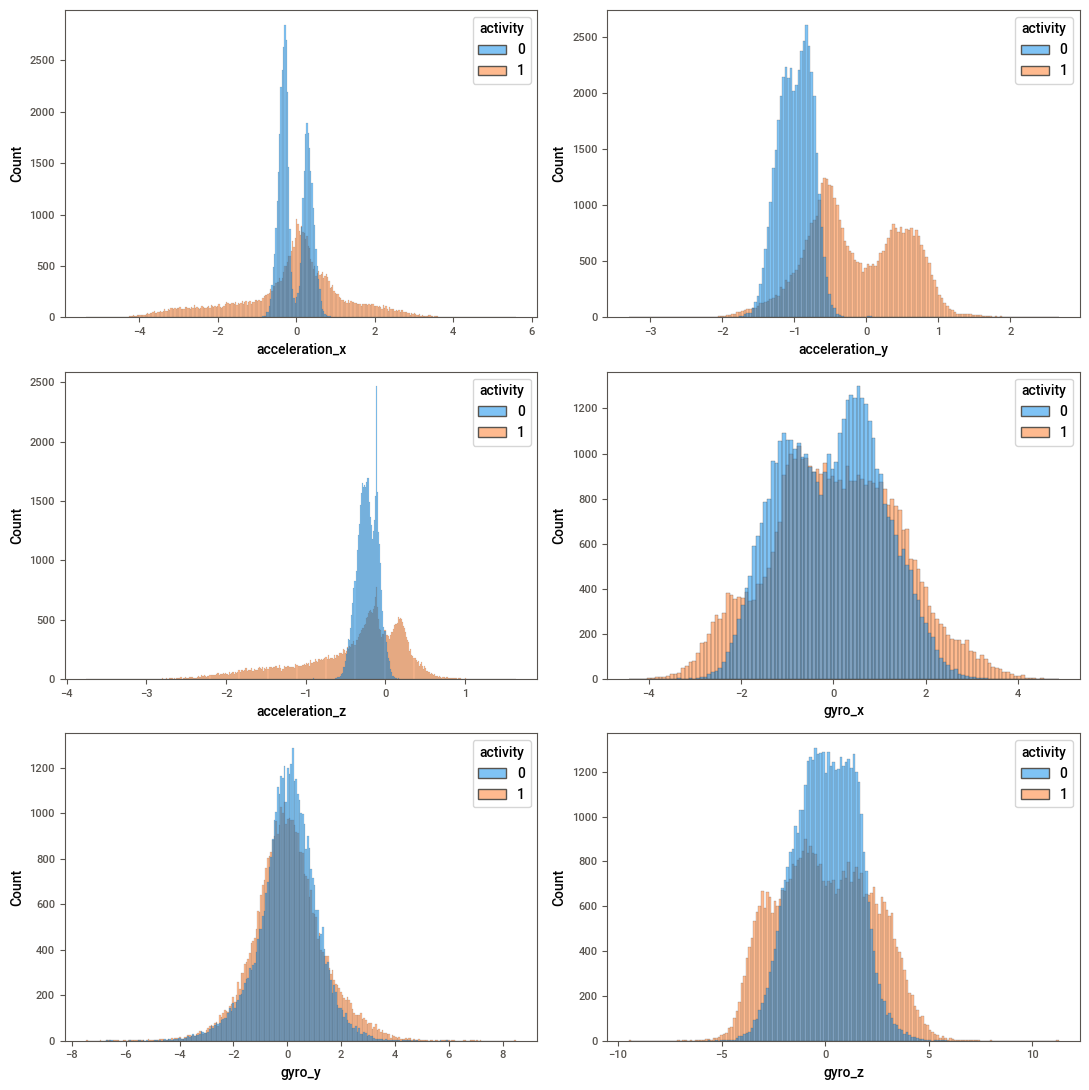

In [337]:
plt.figure(figsize=(11,11))
plotnumber=1
for i in df:
    plt.subplot(3,2,plotnumber)
    sns.histplot(x=df[i], hue=data['activity'])
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

#### Insights
**acceleration_x**: Between range of -1 to +1 we have maximum no.of counts,where as the range below -1 aand above +1 the activity is mostly running.
**acceleration_y**: For the range between -1.8 to -0.5 we have maximum counts as walking, but when it goes beyong -0.5 the activity mostly noted is running.  
**acceleration_z**: For acceleration_z we have most no.of walking activity in the range of -0.5 to +0.2, but when the range is below -0.5 and above +0.2 running is the activity done most.  
**gyro_x,gyro_y,gyro_z**: For these 3 plots we can observe mostly the graphs are overlapping eachother 

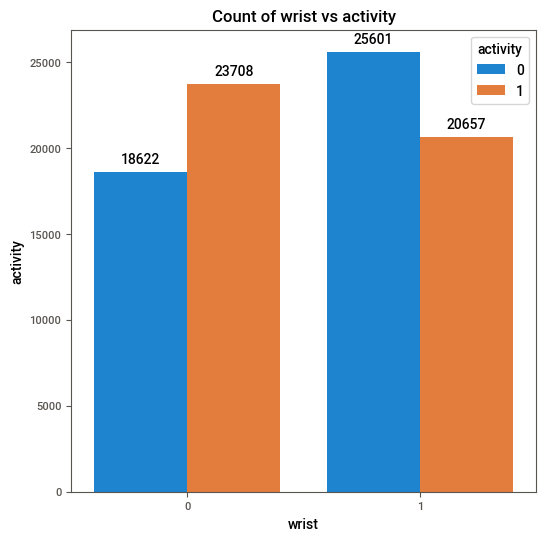

In [338]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x=data['wrist'], hue=data['activity'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xlabel('wrist')
plt.ylabel('activity')
plt.title('Count of wrist vs activity')
plt.show()

activity(0) means - Walking.    
activity(1) means - Running.  
Wrist(0) is Left wrist.       
Wrist(1) is right wrist.    
**Insights**:  
  **Wrist(0)**:* Left hand has 1862 counts of while walking, whereas for running it has 23708 counts.  
  **Wrist(1)**: * Right hand has 25601 counts while walking and for running it has 20657.  
* So we can observe for right hand we have more readings in walking, for left hand more no.of readings in running.

### Preprocessing

#### Handling with Null values

In [339]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

**Insights**: There are no null values in the given data

In [340]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [341]:

df = data.drop(columns=['date','time','username','wrist','activity'],axis=1)
df

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


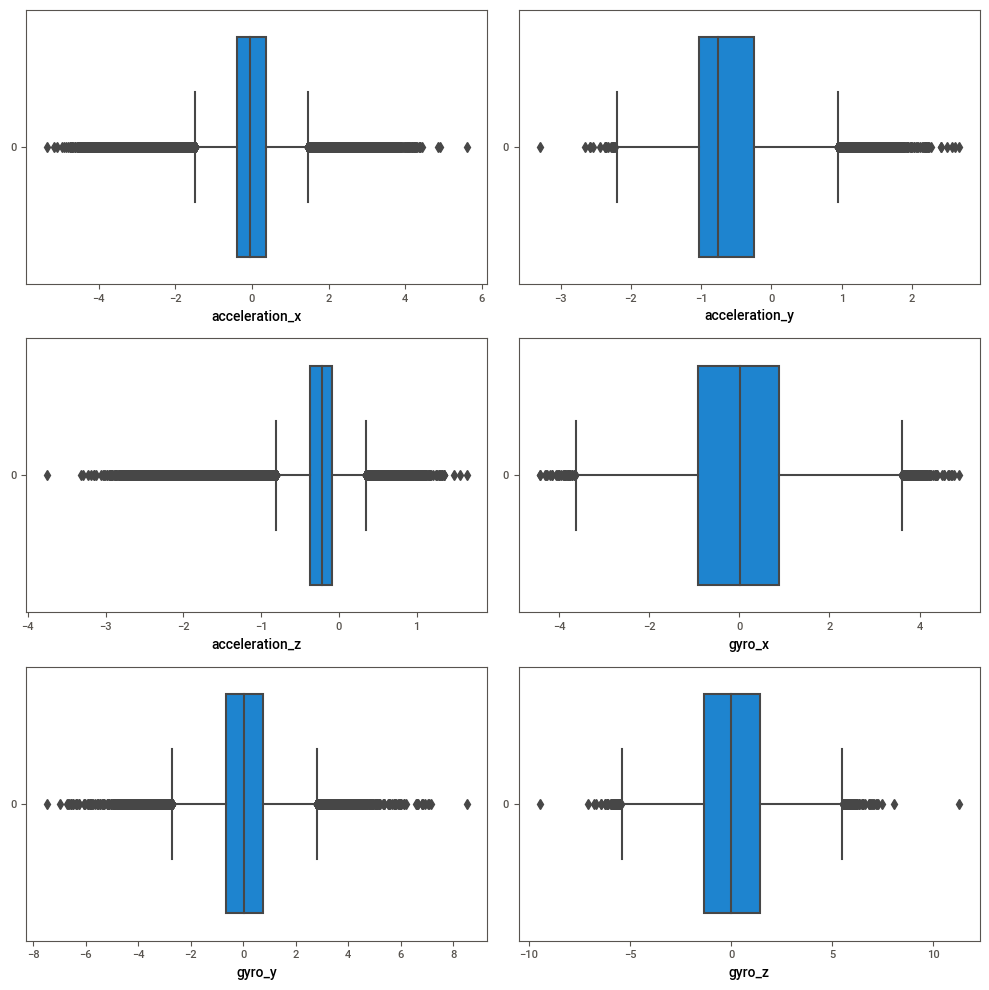

In [342]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in df:
    plt.subplot(3,2,plotnumber)
    sns.boxplot(df[i],orient='h')
    plotnumber = plotnumber+1
    plt.xlabel(i)
plt.tight_layout()

**Insight**: * We can observe for all the plots there are many datapoints laying outside the IQR lines/ranges. But we don't consider them as outliers rather we include them in dataset. But the points which are very far they are considered as outliers.  

In [343]:
data.loc[data.acceleration_x >4 ,'acceleration_x'] = np.median(data.acceleration_x)

In [344]:
data.loc[data.acceleration_y>2,'acceleration_y'] = np.median(data.acceleration_y)

In [345]:
data.loc[data.acceleration_y < -3,'acceleration_y'] = np.median(data.acceleration_y)

In [346]:
data.loc[data.acceleration_z < -3.5 , 'acceleration_z'] = np.median(data.acceleration_z)

In [347]:
data.loc[data.acceleration_z > 1.4,'acceleration_z'] = np.median(data.acceleration_z)

In [348]:
#we didn't found any outliers in gyro_x 

In [349]:
data.loc[data.gyro_y > 7,'gyro_y'] = np.median(data.gyro_y)

In [350]:
data.loc[data.gyro_y < -6.8,'gyro_y'] = np.median(data.gyro_y)

In [351]:
data.loc[data.gyro_z > 9,'gyro_z'] = np.median(data.gyro_z)

In [352]:
data.loc[data.gyro_z < -8,'gyro_z'] = np.median(data.gyro_z)

#### Handling with date column

In [353]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d')

In [354]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [355]:
data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z',
       'year', 'month', 'day'],
      dtype='object')

In [356]:
data.year.nunique()

1

In [357]:
data.year.nunique()

1

In [358]:
data.drop(['date','year'],axis=1,inplace=True)

#### Handling with Time column

In [359]:
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S:%f')
data['time'] = data['time'].dt.hour + data['time'].dt.minute / 60 + data['time'].dt.second / 3600

In [360]:
data

,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
0,13.854167,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30
1,13.854444,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30
2,13.854444,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30
3,13.854444,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30
4,13.854444,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...
88583,20.154167,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,7,9
88584,20.154167,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,7,9
88585,20.154167,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,7,9
88586,20.154167,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,7,9


In [361]:
data.drop('username',axis=1,inplace = True) # as this column depicts only unique value,we can remove this column.

**Categotical to numerical values conversion using Encoding**
* As no column is categorical,no need of applying Encoding techniques.

#### Scaling
* As all the values in every columns are in similar range, no need of applying for scaling

#### Feature Selection
* Feature selection involves choosing a subset of relevant features from the original set to improve model performance and reduce overfitting by removing irrelevant or redundant features.

#### Balancing

In [362]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

* As data is well balanced no need of applying balancing technique

In [363]:
data.corr()

,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
time,1.000000,-0.270552,0.788937,0.096516,0.490456,-0.183534,0.036793,0.024597,-0.008952,-0.201413,-0.082909
wrist,-0.270552,1.000000,-0.113404,-0.609984,0.086092,0.323648,-0.022092,-0.068627,0.008810,0.227086,0.437214
activity,0.788937,-0.113404,1.000000,-0.019214,0.639990,-0.192579,0.040856,0.011928,-0.008119,-0.081821,-0.114293
acceleration_x,0.096516,-0.609984,-0.019214,1.000000,-0.261443,-0.551168,-0.022589,-0.001499,-0.059078,-0.173442,-0.246958
acceleration_y,0.490456,0.086092,0.639990,-0.261443,1.000000,0.105478,0.007434,0.072185,-0.024791,-0.026514,0.010524
acceleration_z,-0.183534,0.323648,-0.192579,-0.551168,0.105478,1.000000,0.034930,-0.020929,0.049554,0.048078,0.243738
gyro_x,0.036793,-0.022092,0.040856,-0.022589,0.007434,0.034930,1.000000,0.093579,0.317810,-0.012304,-0.009496
gyro_y,0.024597,-0.068627,0.011928,-0.001499,0.072185,-0.020929,0.093579,1.000000,0.287455,-0.017206,-0.033026
gyro_z,-0.008952,0.008810,-0.008119,-0.059078,-0.024791,0.049554,0.317810,0.287455,1.000000,0.003321,0.005717
month,-0.201413,0.227086,-0.081821,-0.173442,-0.026514,0.048078,-0.012304,-0.017206,0.003321,1.000000,-0.607614


In [364]:
data.drop('activity',axis = 1).corr()

,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
time,1.000000,-0.270552,0.096516,0.490456,-0.183534,0.036793,0.024597,-0.008952,-0.201413,-0.082909
wrist,-0.270552,1.000000,-0.609984,0.086092,0.323648,-0.022092,-0.068627,0.008810,0.227086,0.437214
acceleration_x,0.096516,-0.609984,1.000000,-0.261443,-0.551168,-0.022589,-0.001499,-0.059078,-0.173442,-0.246958
acceleration_y,0.490456,0.086092,-0.261443,1.000000,0.105478,0.007434,0.072185,-0.024791,-0.026514,0.010524
acceleration_z,-0.183534,0.323648,-0.551168,0.105478,1.000000,0.034930,-0.020929,0.049554,0.048078,0.243738
gyro_x,0.036793,-0.022092,-0.022589,0.007434,0.034930,1.000000,0.093579,0.317810,-0.012304,-0.009496
gyro_y,0.024597,-0.068627,-0.001499,0.072185,-0.020929,0.093579,1.000000,0.287455,-0.017206,-0.033026
gyro_z,-0.008952,0.008810,-0.059078,-0.024791,0.049554,0.317810,0.287455,1.000000,0.003321,0.005717
month,-0.201413,0.227086,-0.173442,-0.026514,0.048078,-0.012304,-0.017206,0.003321,1.000000,-0.607614
day,-0.082909,0.437214,-0.246958,0.010524,0.243738,-0.009496,-0.033026,0.005717,-0.607614,1.000000


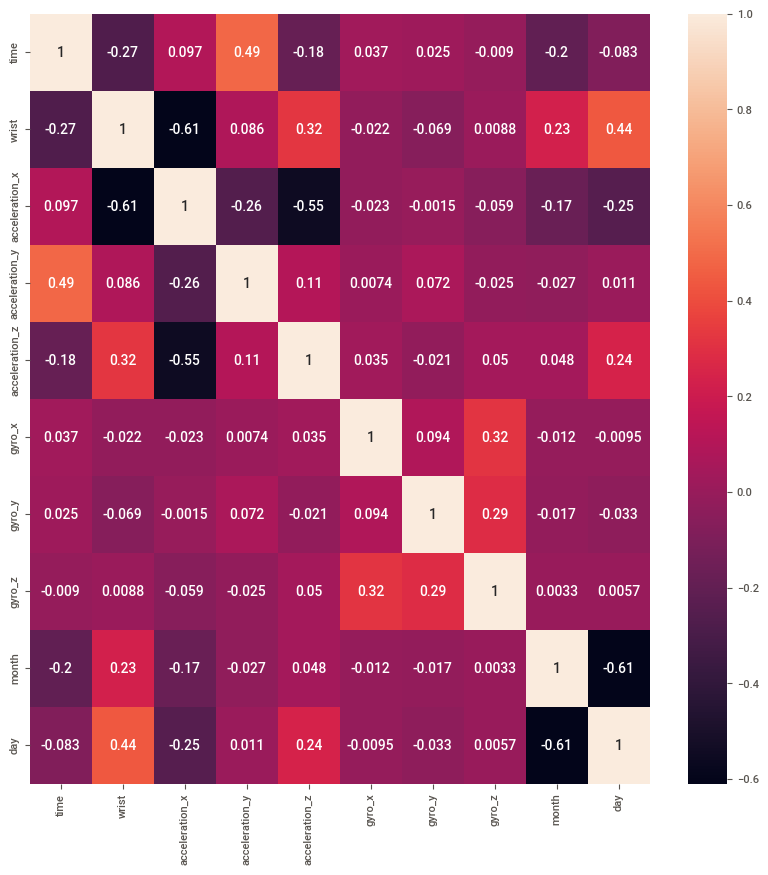

In [365]:
plt.figure(figsize=(10,10))
sns.heatmap(data.drop('activity', axis = 1).corr(), annot = True)
plt.show()

**Insight:**
* We can see that in above plot there is no column can be dropped as no value apart from diagonals are equal to 1.

## Model Creation:
  *  Model creation involves selecting an appropriate algorithm, training it on labeled data to learn patterns, and then evaluating its performance on unseen data to make predictions or classifications.

In [366]:
data.columns

Index(['time', 'wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'month', 'day'],
      dtype='object')

In [367]:
x = data.drop('activity',axis= 1)

In [368]:
x

,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
0,13.854167,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30
1,13.854444,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30
2,13.854444,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30
3,13.854444,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30
4,13.854444,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30
...,...,...,...,...,...,...,...,...,...,...
88583,20.154167,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,7,9
88584,20.154167,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,7,9
88585,20.154167,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,7,9
88586,20.154167,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,7,9


In [369]:
y = data['activity']
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [370]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 42)

In [371]:
x_train

,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
78237,11.815000,0,0.4049,-0.9772,-0.1257,-0.2961,0.8407,-0.3264,7,7
46258,16.348333,0,0.4410,-0.7322,-0.1824,0.3444,0.7996,0.5079,7,17
37654,15.313333,1,-0.2737,-0.6992,-0.0524,-0.8164,-0.0756,1.0735,7,16
71068,18.711389,0,0.2509,0.1686,-0.3262,0.1632,-0.9846,-2.2448,7,6
21412,18.079444,1,-0.2647,0.5164,-0.2238,0.0867,1.2405,0.5384,7,15
...,...,...,...,...,...,...,...,...,...,...
6265,16.034722,1,-0.1714,-1.0067,-0.2231,-1.4891,0.1767,1.7018,7,10
54886,16.170556,0,0.4980,-1.0698,-0.1829,1.0147,1.0042,3.2428,7,1
76820,19.080000,0,0.3459,-0.8581,-0.0603,-0.6830,-0.0735,-1.3448,7,6
860,20.572222,0,-0.4821,-0.5633,0.0581,0.4138,0.5662,0.6665,6,30


In [372]:
x_test

,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
57800,18.196944,0,1.6815,-0.4641,-0.9647,0.2961,-1.5709,-1.6958,7,1
53690,20.107222,1,-0.1132,0.4044,-0.2144,1.7535,-0.7964,3.5975,7,17
75294,18.970278,0,2.2226,-1.8281,-2.2184,-0.1521,-0.3216,2.7630,7,6
16113,18.220833,1,0.0571,0.5462,-0.1377,0.7485,0.0477,2.0552,7,15
88456,20.160833,0,0.3597,-1.2908,-0.3557,-0.8036,-0.7982,-1.3781,7,9
...,...,...,...,...,...,...,...,...,...,...
27342,14.048889,1,-0.2275,-0.7284,-0.3486,1.3073,1.1727,-0.6836,7,16
81848,19.757778,0,2.3815,-1.3089,-1.5518,0.2713,-0.8986,-3.2026,7,9
27529,14.513889,1,-0.3580,-0.4656,-0.2201,0.8174,-0.0255,-1.3093,7,16
57508,17.005278,0,0.2424,-0.8110,-0.1631,0.3386,0.9206,0.1688,7,1


In [373]:
y_train

78237    0
46258    0
37654    0
71068    1
21412    1
        ..
6265     0
54886    0
76820    0
860      1
15795    1
Name: activity, Length: 66441, dtype: int64

In [374]:
y_test

57800    1
53690    1
75294    1
16113    1
88456    0
        ..
27342    0
81848    1
27529    0
57508    0
73131    1
Name: activity, Length: 22147, dtype: int64

### Model Creation by Logistic Regression

In [375]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [376]:
y_pred = LR.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [377]:
x_test

,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
57800,18.196944,0,1.6815,-0.4641,-0.9647,0.2961,-1.5709,-1.6958,7,1
53690,20.107222,1,-0.1132,0.4044,-0.2144,1.7535,-0.7964,3.5975,7,17
75294,18.970278,0,2.2226,-1.8281,-2.2184,-0.1521,-0.3216,2.7630,7,6
16113,18.220833,1,0.0571,0.5462,-0.1377,0.7485,0.0477,2.0552,7,15
88456,20.160833,0,0.3597,-1.2908,-0.3557,-0.8036,-0.7982,-1.3781,7,9
...,...,...,...,...,...,...,...,...,...,...
27342,14.048889,1,-0.2275,-0.7284,-0.3486,1.3073,1.1727,-0.6836,7,16
81848,19.757778,0,2.3815,-1.3089,-1.5518,0.2713,-0.8986,-3.2026,7,9
27529,14.513889,1,-0.3580,-0.4656,-0.2201,0.8174,-0.0255,-1.3093,7,16
57508,17.005278,0,0.2424,-0.8110,-0.1631,0.3386,0.9206,0.1688,7,1


In [378]:
np.array(y_test)

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

#### Model Evaluation for Logistic Regression

In [379]:
acc = accuracy_score(y_test,y_pred)
print('accuracy score',acc)

accuracy score 0.9524540569828871


In [380]:
pr = precision_score(y_test,y_pred)
print('precision score',pr)

precision score 0.9386150856739092


In [381]:
re = recall_score(y_pred,y_test)
print('recall score',re)

recall score 0.9386150856739092


In [382]:
f1 = f1_score(y_pred,y_test)
print('f1_score',f1)

f1_score 0.9527950867440713


In [383]:
ras = roc_auc_score(y_pred,y_test)
print('roc_auc_score',ras)

roc_auc_score 0.952771746070211


In [384]:
cla = classification_report(y_pred,y_test)
print('classification_report',cla)

classification_report               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10825
           1       0.97      0.94      0.95     11322

    accuracy                           0.95     22147
   macro avg       0.95      0.95      0.95     22147
weighted avg       0.95      0.95      0.95     22147



#### Model Creation by KNN-Classifier

In [385]:
err_rate = []
for i in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors= i,n_jobs=-1)
    knn1.fit(x_train,y_train)
    y_pred1 = knn1.predict(x_test)
    error_rate = (y_test !=y_pred1).sum()/len(y_test) * 100
    err_rate.append(error_rate)
print(err_rate)

[0.3115546123628482, 0.4199214340542737, 0.3115546123628482, 0.3883144443942746, 0.37476859168284643, 0.42443671829141644, 0.4063755813428455, 0.4695895606628437, 0.42443671829141644, 0.46507427642570104]


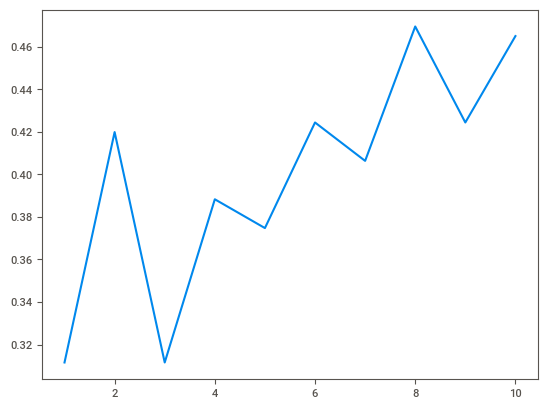

In [386]:
# plotting to check the nearest neighbours with least error rate
plt.plot(range(1,11),err_rate)
plt.show()

In [387]:
knn = KNeighborsClassifier(5)

In [388]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [389]:
y_pred_knn = knn.predict(x_test)

In [390]:
y_pred_knn_train = knn.predict(x_train)

## Model Evaluation KNN - Classifier

In [391]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_knn)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_knn_train)}")

 accuracy_score for test data : 0.9962523140831715
 accuracy_score for train data : 0.9979831730407429


In [392]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_knn)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_knn_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.99      1.00      1.00     11162
           1       1.00      0.99      1.00     10985

    accuracy                           1.00     22147
   macro avg       1.00      1.00      1.00     22147
weighted avg       1.00      1.00      1.00     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



In [393]:
print("precision_score for test data:",precision_score(y_test,y_pred_knn,average='weighted'))

precision_score for test data: 0.9962590071008431


In [394]:
print("recall_score for test data:",recall_score(y_test,y_pred_knn,average='weighted'))

recall_score for test data: 0.9962523140831715


## Hyperparameter Tuning - KNN

In [395]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

In [396]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [397]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [398]:
best_knn_model = grid_search.best_estimator_

In [399]:
knn_pred = best_knn_model.predict(x_test)

In [400]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy of the Best Model:", accuracy)

Accuracy of the Best Model: 0.9973359823000858


In [401]:
print("precision_score for test data:",precision_score(y_test, knn_pred,average='weighted'))

precision_score for test data: 0.9973427222465674


In [402]:
print("recall_score for test data:",recall_score(y_test, knn_pred,average='weighted'))

recall_score for test data: 0.9973359823000858


## Model creation by using SVM-Classifier

In [403]:
svc = SVC()

In [404]:
svc.fit(x_train,y_train)

SVC()

In [405]:
y_pred_svc = svc.predict(x_test)

In [406]:
y_pred_svc_train = svc.predict(x_train)

## Model Evaluation SVM - Classifier

In [407]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_svc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_svc_train)}")

 accuracy_score for test data : 0.9608073328216011
 accuracy_score for train data : 0.9602956006080583


In [408]:
print("precision_score for test data:",precision_score(y_test,y_pred_svc,average='weighted'))

precision_score for test data: 0.9633436067665466


In [409]:
print("recall_score for test data:",recall_score(y_test,y_pred_svc,average='weighted'))

recall_score for test data: 0.9608073328216011


In [410]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_svc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_svc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      0.92      0.96     11162
           1       0.93      1.00      0.96     10985

    accuracy                           0.96     22147
   macro avg       0.96      0.96      0.96     22147
weighted avg       0.96      0.96      0.96     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      0.92      0.96     33061
           1       0.93      1.00      0.96     33380

    accuracy                           0.96     66441
   macro avg       0.96      0.96      0.96     66441
weighted avg       0.96      0.96      0.96     66441



## Model Creation By Using Decision Tree Classifier

In [411]:
dtc = DecisionTreeClassifier()

In [412]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [413]:
y_pred_dtc= dtc.predict(x_test)

In [414]:
y_pred_dtc_train=dtc.predict(x_train)

## Model Evaluation Decision Tree¶

In [415]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_dtc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_dtc_train)}")

 accuracy_score for test data : 0.9954395629204859
 accuracy_score for train data : 1.0


In [416]:
print("precision_score for test data:",precision_score(y_test,y_pred_dtc,average='weighted'))

precision_score for test data: 0.9954395702527056


In [417]:
print("recall_score for test data:",recall_score(y_test,y_pred_dtc,average='weighted'))

recall_score for test data: 0.9954395629204859


In [418]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_dtc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_dtc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11162
           1       1.00      1.00      1.00     10985

    accuracy                           1.00     22147
   macro avg       1.00      1.00      1.00     22147
weighted avg       1.00      1.00      1.00     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

## HyperParameter Tuning for Decision Tree

In [419]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [420]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [421]:
# Train the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_dt_classifier.predict(x_test)

In [422]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for Decision Tree:", accuracy)

Test Accuracy for Decision Tree: 0.9964780782950287


## Model creation by using Random Forest Classifier

In [423]:
rfc=RandomForestClassifier()

In [424]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [425]:
y_pred_rfc=rfc.predict(x_test)

In [426]:
y_pred_rfc_train = rfc.predict(x_train)

## Model Evaluation Random Forest Classifier

In [427]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_rfc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_rfc_train)}")

 accuracy_score for test data : 0.9988711789407143
 accuracy_score for train data : 1.0


In [428]:
print("precision_score for test data:",precision_score(y_test,y_pred_rfc,average='weighted'))

precision_score for test data: 0.9988718771158934


In [429]:
print("recall_score for test data:",recall_score(y_test,y_pred_rfc,average='weighted'))

recall_score for test data: 0.9988711789407143


In [430]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_rfc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_rfc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11162
           1       1.00      1.00      1.00     10985

    accuracy                           1.00     22147
   macro avg       1.00      1.00      1.00     22147
weighted avg       1.00      1.00      1.00     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



## HyperParameter Tuning for Random_Forest

In [431]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [432]:
# Use GridSearchCV to find the best hyperparameters
grid_search = RandomizedSearchCV(rfc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

In [433]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       n_estimators=200)

In [434]:
# Make predictions on the test set
y_pred_rfc = best_rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy'}
Test Accuracy: 0.9990517903102


## By using bagging base estimator is Decision Tree

In [435]:
model_bagg = BaggingClassifier(base_estimator=dtc, n_estimators=30,random_state=15,n_jobs=-1)

model_bagg.fit(x_train,y_train)

y_pred_bagg = model_bagg.predict(x_test)

In [436]:
y_pred_bagg_train=model_bagg.predict(x_train)

In [437]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_bagg)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_bagg_train)}")

 accuracy_score for test data : 0.9974262879848287
 accuracy_score for train data : 0.9999698981050857


In [438]:
print("precision_score for test data:",precision_score(y_test,y_pred_bagg,average='weighted'))

precision_score for test data: 0.9974277877583416


In [439]:
print("recall_score for test data:",recall_score(y_test,y_pred_bagg,average='weighted'))

recall_score for test data: 0.9974262879848287


## Model creation by using XGBoost

In [440]:
from xgboost import XGBClassifier
xgc=XGBClassifier() 
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [441]:
y_pred_xgc = xgc.predict(x_test)

In [442]:
y_pred_xgc_train= xgc.predict(x_train)

## Model Evaluation XGBoost Classifier

In [443]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_xgc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_xgc_train)}")

 accuracy_score for test data : 0.9996839301034
 accuracy_score for train data : 1.0


In [444]:
print("precision_score for test data:",precision_score(y_test,y_pred_xgc,average='weighted'))

precision_score for test data: 0.9996839674648035


In [445]:
print("recall_score for test data:",recall_score(y_test,y_pred_xgc,average='weighted'))

recall_score for test data: 0.9996839301034


In [446]:
# classification report for test data 
print(f"classification_report for test data : {classification_report(y_test,y_pred_xgc)}")
# classification report for train data 
print(f"classification_report for train data : {classification_report(y_train,y_pred_xgc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11162
           1       1.00      1.00      1.00     10985

    accuracy                           1.00     22147
   macro avg       1.00      1.00      1.00     22147
weighted avg       1.00      1.00      1.00     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



In [447]:
y_pred_xgc = xgc.predict(x_test)

y_pred_xgc_train= xgc.predict(x_train)
# classification report for test data 
print(f"classification_report for test data : {classification_report(y_test,y_pred_xgc)}")
# classification report for train data 
print(f"classification_report for train data : {classification_report(y_train,y_pred_xgc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11162
           1       1.00      1.00      1.00     10985

    accuracy                           1.00     22147
   macro avg       1.00      1.00      1.00     22147
weighted avg       1.00      1.00      1.00     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



## Model creation by using Neural Networks

### Model creation by using MLP Classifier

In [448]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [449]:
# Create the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)

In [450]:
# Train the model
mlp.fit(x_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(x_test)

In [451]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred_mlp)
print(f'Test Accuracy for MLP Classifier: {accuracy}')

Test Accuracy for MLP Classifier: 0.9975165936695715


In [452]:
print("precision_score for test data:",precision_score(y_test,y_pred_mlp,average='weighted'))

precision_score for test data: 0.9975171043443747


In [453]:
print("recall_score for test data:",recall_score(y_test,y_pred_mlp,average='weighted'))

recall_score for test data: 0.9975165936695715


### Model creation by using ANN

In [454]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Assuming 3 classes for iris dataset
])

In [455]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [456]:
# Train the model
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
1661/1661 [==============================] - 8s 4ms/step - loss: 0.0539 - accuracy: 0.9829 - val_loss: 0.0225 - val_accuracy: 0.9921
Epoch 2/15
1661/1661 [==============================] - 6s 4ms/step - loss: 0.0162 - accuracy: 0.9943 - val_loss: 0.0132 - val_accuracy: 0.9956
Epoch 3/15
1661/1661 [==============================] - 6s 4ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0133 - val_accuracy: 0.9958
Epoch 4/15
1661/1661 [==============================] - 6s 4ms/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0127 - val_accuracy: 0.9955
Epoch 5/15
1661/1661 [==============================] - 6s 4ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0138 - val_accuracy: 0.9958
Epoch 6/15
1661/1661 [==============================] - 6s 4ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0136 - val_accuracy: 0.9960
Epoch 7/15
1661/1661 [==============================] - 6s 3ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0112 - val_accuracy:

In [457]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

693/693 [==============================] - 2s 3ms/step - loss: 0.0095 - accuracy: 0.9973


In [458]:
print(f'\nTest Accuracy for ANN : {test_accuracy}')


Test Accuracy for ANN : 0.997290849685669


### Model Comparison Report:  
**LogisticRegression Model:**  
Accuracy_score : 0.9524540569828871
Precision_score: 0.9386150856739092
Recall_score   : 0.9386150856739092 
* Logistic regression is known for its simplicity and interpretability, making it easy to understand and implement.  

**K Nearest Neighbors Classifier Model:**  
Accuracy_score : 0.9962523140831715  
Precision_score:0.9962590071008431    
Recall_score   :0.9962523140831715  
* KNN is able to handle  the non-linear relationships in data without making strong assumptions.  

**SVM Classifier Model:**  
Accuracy_score :  0.9608073328216011  
Precision_score:  0.9633436067665466 
Recall_score:     0.9608073328216011
* SVM's are effective in high-dimensional spaces and can handle non-linear relationships.  

**Decision Tree Classifier Model:**  
Accuracy_score :0.9951234930238858    
Precision_score:0.995123516215482  
Recall_score:0.9951234930238858  
* Decision trees may be prone to overfitting, and their interpretability is a strength.  

**Random Forest Classifier Model:**  
Accuracy_score :0.9989614846254572    
Precision_score:0.9989621820777737  
Recall_score:0.9989614846254572 
* Random Forests are an ensemble method known for handling complex relationships and reducing overfitting.  

**Bagging using Decision Tree Classifier:**  
Accuracy_score 0.9973811351424572  
Precision_score:0.9973824834282337  
Recall_score:0.9973811351424572   
* Bagging reduces overfitting and improves model robustness,enhancing the generalization performance of the model.    

**XGBoost Classifier:**  
Accuracy_score :0.9996839301034  
Precision_score:0.9996841313851755  
Recall_score:0.9996839301034  
* XGBoost is a powerful boosting algorithm known for its efficiency and performance.  

**MLP:**  
Accuracy_score :0.9978326829353413  
Precision_score:0.9978326829353413   
Recall_score:0.9978326635661715  

**ANN:**  
Accuracy_score :0.9973811507225037  

### Conclusion:
XGBoost emerges as the most effective model for accurately distinguishing between walking and running instances in our dataset. This determination underscores the significance of selecting a model that not only excels in accuracy but also demonstrates adaptability and reliability across different scenarios, making XGBoost the preferred choice for the walk-run classification task.

### Challenges Faced:
Navigating the walk-run dataset presented challenges, primarily centered around the complexities of managing the date and time columns. Addressing these intricacies required careful consideration and specialized handling, adding a layer of complexity to the overall data processing and analysis tasks.